In [1]:
%matplotlib notebook #this is to make the graph interactive (Zoom in/out , PAN Rotate)
import pandas as pd
import numpy as np
import math
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import datetime
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

df = pd.read_csv("GOOG.csv")

In [2]:
df.set_index('Date', inplace = True)
print(df.head (2))

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2004-08-19  49.676899  51.693783  47.669952  49.845802  49.845802  44994500
2004-08-20  50.178635  54.187561  49.925285  53.805050  53.805050  23005800


In [3]:
df['HL_PCT']= (df['High']-df['Low'])/df['Low']
df['PCT_change']= (df['Adj Close']-df['Open'])/df['Open']
print(df.head(2))

                 Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2004-08-19  49.676899  51.693783  47.669952  49.845802  49.845802  44994500   
2004-08-20  50.178635  54.187561  49.925285  53.805050  53.805050  23005800   

              HL_PCT  PCT_change  
Date                              
2004-08-19  0.084410     0.00340  
2004-08-20  0.085373     0.07227  


In [4]:
df = df[['HL_PCT','PCT_change','Adj Close','Volume']]

In [5]:
print(df.head(2))

              HL_PCT  PCT_change  Adj Close    Volume
Date                                                 
2004-08-19  0.084410     0.00340  49.845802  44994500
2004-08-20  0.085373     0.07227  53.805050  23005800


In [6]:
forecast_col = 'Adj Close'
forecast_out = math.ceil(0.01* len(df))   # a part of data that we will be forecasting
print(forecast_out)
df.fillna(-99999, inplace = True)
df['label']= df[forecast_col].shift(-forecast_out)
#print(df.tail(38))

37


In [7]:
X = np.array(df.drop(['label'], 1))
X = X[:-forecast_out]
X_predict = X[-forecast_out:]
y = np.array(df['label'])
y = y[:-forecast_out]
#X = preprocessing.scale(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
clf = LinearRegression(n_jobs = -1)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print (accuracy)
forecast_value = clf.predict(X_predict)
print(forecast_value, accuracy)

0.9792154657299527
[1130.47195876 1124.02064364 1092.85940517 1105.79458627 1110.52354304
 1110.31570696 1053.33377733 1101.33110735 1071.15361496 1013.52126659
 1042.46259161 1083.59758781 1079.39916624 1065.79748668 1046.22854512
 1064.78263243 1101.36839719 1091.78695053 1075.42902472 1046.27733994
 1044.84976899 1052.72072223 1070.96605512 1071.49588197 1024.98798442
 1032.58388218 1048.2782849  1034.92167011 1059.07525216 1054.25977365
 1090.37109282 1098.37604999 1103.94121872 1115.44393074 1053.78868849
 1074.60913178 1041.20760457] 0.9792154657299527


In [9]:
df['Forecast'] = np.nan
#time_format = (df.iloc[-1]) 
#last_date = datetime.datetime.strptime(time_format,"%Y-%m-%d")


last_date_ = df.iloc[-1].name
last_date = datetime.datetime.strptime(last_date_,"%Y-%m-%d" )
print (last_date)
last_unix = last_date.timestamp()
print (last_unix)

2019-02-01 00:00:00
1548959400.0


              HL_PCT  PCT_change  Adj Close      Volume      label  Forecast
Date                                                                        
2004-08-19  0.084410    0.003400  49.845802  44994500.0  68.256058       NaN
2004-08-20  0.085373    0.072270  53.805050  23005800.0  69.994751       NaN
2004-08-23  0.040623   -0.012190  54.346527  18393200.0  70.541199       NaN
2004-08-24  0.077532   -0.057264  52.096165  15361800.0  71.589378       NaN
2004-08-25  0.039661    0.009909  52.657513   9257400.0  74.098061       NaN


<IPython.core.display.Javascript object>


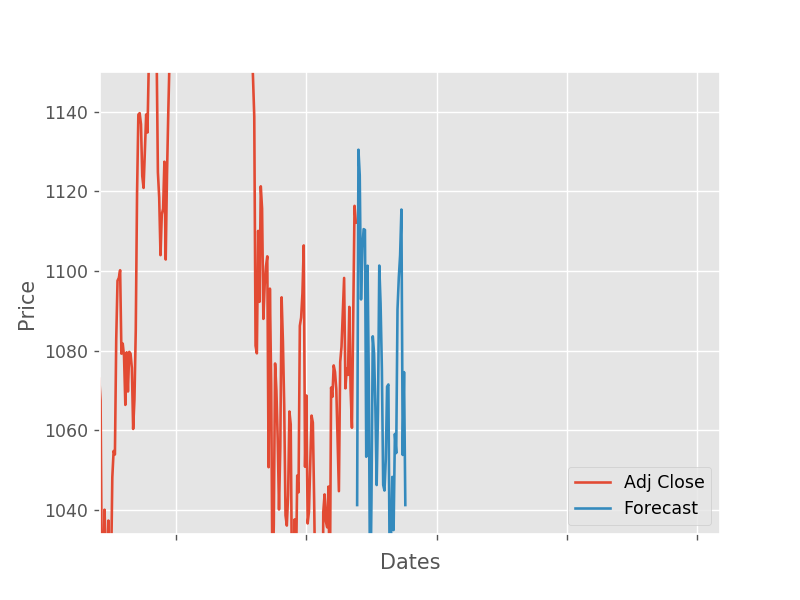

In [16]:

one_day = 24*60*60    #seconds in a day
next_unix = last_unix + one_day

for i in forecast_value:
    Date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[Date] = [np.nan for all in range(len(df.columns)-1)] + [i]
    
print (df.head())
   
df['Adj Close'].plot()
df['Forecast'].plot()
plt.legend(loc = 4)
plt.xlabel('Dates')
plt.ylabel ('Price')
plt.show() 
